In [ ]:
# Import the pandas library as pd
import pandas as pd

# Read 'police.csv' into a DataFrame named ri
ri = pd.read_csv('police.csv')

# Examine the head of the DataFrame
print(ri.head())

# Count the number of missing values in each column
print(ri.isnull().sum())

  state   stop_date stop_time  ...  stop_duration drugs_related_stop district
0    RI  2005-01-04     12:55  ...       0-15 Min              False  Zone X4
1    RI  2005-01-23     23:15  ...       0-15 Min              False  Zone K3
2    RI  2005-02-17     04:15  ...       0-15 Min              False  Zone X4
3    RI  2005-02-20     17:15  ...      16-30 Min              False  Zone X1
4    RI  2005-02-24     01:20  ...       0-15 Min              False  Zone X3

[5 rows x 15 columns]
state                     0
stop_date                 0
stop_time                 0
county_name           58689
driver_gender          3609
driver_race            3607
violation_raw          3607
violation              3607
search_conducted          0
search_type           56337
stop_outcome           3607
is_arrested            3607
stop_duration          3607
drugs_related_stop        0
district                  0
dtype: int64


In [ ]:
# Examine the shape of the DataFrame
print(ri.shape)

# Drop the 'county_name' and 'state' columns
ri.drop(['county_name', 'state'], axis='columns', inplace=True)

# Examine the shape of the DataFrame (again)
print(ri.shape)

(58689, 15)
(58689, 13)


In [ ]:
# Count the number of missing values in each column
print(ri.isnull().sum())

# Drop all rows that are missing 'driver_gender'
ri.dropna(subset=['driver_gender'], inplace=True)

# Count the number of missing values in each column (again)
print(ri.isnull().sum())

# Examine the shape of the DataFrame
print(ri.shape)

stop_date                 0
stop_time                 0
driver_gender          3609
driver_race            3607
violation_raw          3607
violation              3607
search_conducted          0
search_type           56337
stop_outcome           3607
is_arrested            3607
stop_duration          3607
drugs_related_stop        0
district                  0
dtype: int64
stop_date                 0
stop_time                 0
driver_gender             0
driver_race               0
violation_raw             0
violation                 0
search_conducted          0
search_type           52728
stop_outcome              0
is_arrested               0
stop_duration             0
drugs_related_stop        0
district                  0
dtype: int64
(55080, 13)


In [ ]:
# Examine the head of the 'is_arrested' column
print(ri.is_arrested.head())

# Change the data type of 'is_arrested' to 'bool'
ri['is_arrested'] = ri.is_arrested.astype('bool')

# Check the data type of 'is_arrested' 
print(ri.is_arrested.dtype)

0    False
1    False
2    False
3     True
4    False
Name: is_arrested, dtype: object
bool


In [ ]:
# Concatenate 'stop_date' and 'stop_time' (separated by a space)
combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')

# Convert 'combined' to datetime format
ri['stop_datetime'] = pd.to_datetime(combined)

# Examine the data types of the DataFrame
print(ri.dtypes)

stop_date                     object
stop_time                     object
driver_gender                 object
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                     bool
stop_duration                 object
drugs_related_stop              bool
district                      object
stop_datetime         datetime64[ns]
dtype: object


In [ ]:
# Set 'stop_datetime' as the index
ri.set_index('stop_datetime', inplace=True)

# Examine the index
print(ri.index)

# Examine the columns
print(ri.columns)

DatetimeIndex(['2005-01-04 12:55:00', '2005-01-23 23:15:00',
               '2005-02-17 04:15:00', '2005-02-20 17:15:00',
               '2005-02-24 01:20:00', '2005-03-14 10:00:00',
               '2005-03-29 21:55:00', '2005-04-04 21:25:00',
               '2005-07-14 11:20:00', '2005-07-14 19:55:00',
               ...
               '2012-04-01 13:33:00', '2012-04-01 13:58:00',
               '2012-04-01 14:15:00', '2012-04-01 14:17:00',
               '2012-04-01 14:21:00', '2012-04-01 15:43:00',
               '2012-04-02 00:18:00', '2012-04-02 00:34:00',
               '2012-04-02 01:05:00', '2012-04-02 01:19:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=55080, freq=None)
Index(['stop_date', 'stop_time', 'driver_gender', 'driver_race',
       'violation_raw', 'violation', 'search_conducted', 'search_type',
       'stop_outcome', 'is_arrested', 'stop_duration', 'drugs_related_stop',
       'district'],
      dtype='object')


In [ ]:
# Count the unique values in 'violation'
print(ri.violation.value_counts())

# Express the counts as proportions
print(ri.violation.value_counts(normalize=True))

Speeding               34472
Moving violation        9964
Equipment               5219
Other                   3333
Registration/plates     2092
Name: violation, dtype: int64
Speeding               0.625853
Moving violation       0.180901
Equipment              0.094753
Other                  0.060512
Registration/plates    0.037981
Name: violation, dtype: float64


In [ ]:
# Create a DataFrame of female drivers
female = ri[ri['driver_gender'] == 'F']

# Create a DataFrame of male drivers
male = ri[ri['driver_gender'] == 'M']

# Compute the violations by female drivers (as proportions)
print(female.violation.value_counts(normalize=True))

# Compute the violations by male drivers (as proportions)
print(male.violation.value_counts(normalize=True))

Speeding               0.735711
Moving violation       0.120243
Equipment              0.075569
Registration/plates    0.039217
Other                  0.029259
Name: violation, dtype: float64
Speeding               0.586001
Moving violation       0.202905
Equipment              0.101712
Other                  0.071849
Registration/plates    0.037533
Name: violation, dtype: float64


In [ ]:
# Create a DataFrame of female drivers stopped for speeding
female_and_speeding = ri[(ri['driver_gender'] == 'F') & (ri['violation'] == 'Speeding')]

# Create a DataFrame of male drivers stopped for speeding
male_and_speeding = ri[(ri['driver_gender'] == 'M') & (ri['violation'] == 'Speeding')]

# Compute the stop outcomes for female drivers (as proportions)
print(female_and_speeding.stop_outcome.value_counts(normalize=True))

# Compute the stop outcomes for male drivers (as proportions)
print(male_and_speeding.stop_outcome.value_counts(normalize=True))

Citation            0.975712
Warning             0.015203
Arrest Driver       0.006953
N/D                 0.001298
Arrest Passenger    0.000649
No Action           0.000185
Name: stop_outcome, dtype: float64
Citation            0.963057
Arrest Driver       0.018450
Warning             0.015242
Arrest Passenger    0.001267
N/D                 0.001140
No Action           0.000844
Name: stop_outcome, dtype: float64


In [ ]:
# Check the data type of 'search_conducted'
print(ri.search_conducted.dtype)

# Calculate the search rate by counting the values
print(ri.search_conducted.value_counts(normalize=True))

# Calculate the search rate by taking the mean
print(ri.search_conducted.mean())

bool
False    0.957298
True     0.042702
Name: search_conducted, dtype: float64
0.042701525054466234


In [ ]:
# Calculate the search rate for female drivers
print(ri[ri['driver_gender'] == 'F'].search_conducted.mean())

0.0219615332151139


In [ ]:
# Calculate the search rate for male drivers
print(ri[ri['driver_gender'] == 'M'].search_conducted.mean())

0.05022514721163838


In [ ]:
# Calculate the search rate for both groups simultaneously
print(ri.groupby('driver_gender').search_conducted.mean())

driver_gender
F    0.021962
M    0.050225
Name: search_conducted, dtype: float64


In [ ]:
# Calculate the search rate for each combination of gender and violation
print(ri.groupby(['driver_gender', 'violation']).search_conducted.mean())

driver_gender  violation          
F              Equipment              0.065884
               Moving violation       0.045377
               Other                  0.053613
               Registration/plates    0.080000
               Speeding               0.009270
M              Equipment              0.099246
               Moving violation       0.065724
               Other                  0.047865
               Registration/plates    0.143705
               Speeding               0.030652
Name: search_conducted, dtype: float64


In [ ]:
# Reverse the ordering to group by violation before gender
print(ri.groupby(['violation', 'driver_gender']).search_conducted.mean())

violation            driver_gender
Equipment            F                0.065884
                     M                0.099246
Moving violation     F                0.045377
                     M                0.065724
Other                F                0.053613
                     M                0.047865
Registration/plates  F                0.080000
                     M                0.143705
Speeding             F                0.009270
                     M                0.030652
Name: search_conducted, dtype: float64


In [ ]:
# Count the 'search_type' values
print(ri.search_type.value_counts())

# Check if 'search_type' contains the string 'Protective Frisk'
ri['frisk'] = ri.search_type.str.contains('Protective Frisk', na=False)

# Check the data type of 'frisk'
print(ri.frisk.dtype)

# Take the sum of 'frisk'
print(ri.frisk.sum())

Incident to Arrest                                          1026
Probable Cause                                               526
Reasonable Suspicion                                         158
Inventory                                                    140
Protective Frisk                                             130
Incident to Arrest,Inventory                                  95
Incident to Arrest,Probable Cause                             72
Incident to Arrest,Protective Frisk                           32
Probable Cause,Reasonable Suspicion                           27
Probable Cause,Protective Frisk                               26
Incident to Arrest,Inventory,Probable Cause                   25
Incident to Arrest,Inventory,Protective Frisk                 18
Protective Frisk,Reasonable Suspicion                         16
Inventory,Probable Cause                                      14
Inventory,Protective Frisk                                    12
Incident to Arrest,Probab

In [ ]:
# Create a DataFrame of stops in which a search was conducted
searched = ri[ri.search_conducted == True]

# Calculate the overall frisk rate by taking the mean of 'frisk'
print(searched.frisk.mean())

# Calculate the frisk rate for each gender
print(searched.groupby('driver_gender').frisk.mean())

0.10799319727891156
driver_gender
F    0.077640
M    0.112808
Name: frisk, dtype: float64


In [21]:
# Calculate the overall arrest rate
print(ri.is_arrested.mean())

# Calculate the hourly arrest rate
print(ri.groupby(ri.index.hour).is_arrested.mean())

# Save the hourly arrest rate
hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.mean()

0.03798111837327524
stop_datetime
0     0.051167
1     0.071615
2     0.071176
3     0.060958
4     0.044776
5     0.021583
6     0.010758
7     0.013923
8     0.021392
9     0.026438
10    0.030878
11    0.031412
12    0.037538
13    0.032431
14    0.033486
15    0.035254
16    0.039700
17    0.044135
18    0.043171
19    0.037390
20    0.037500
21    0.069507
22    0.054536
23    0.047776
Name: is_arrested, dtype: float64


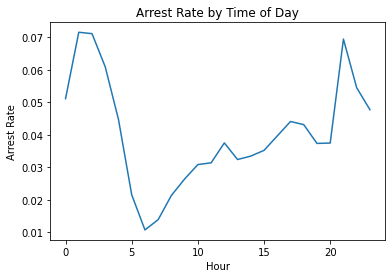

In [22]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Create a line plot of 'hourly_arrest_rate'
plt.plot(hourly_arrest_rate)

# Add the xlabel, ylabel, and title
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

# Display the plot
plt.show()

stop_datetime
2005-12-31    0.006501
2006-12-31    0.007258
2007-12-31    0.007970
2008-12-31    0.007505
2009-12-31    0.009889
2010-12-31    0.010081
2011-12-31    0.009731
2012-12-31    0.009577
Freq: A-DEC, Name: drugs_related_stop, dtype: float64


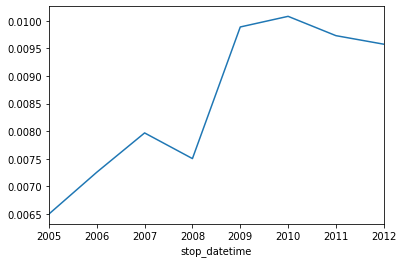

In [23]:
# Calculate the annual rate of drug-related stops
print(ri.drugs_related_stop.resample('A').mean())

# Save the annual rate of drug-related stops
annual_drug_rate = ri.drugs_related_stop.resample('A').mean()

# Create a line plot of 'annual_drug_rate'
annual_drug_rate.plot()

# Display the plot
plt.show()

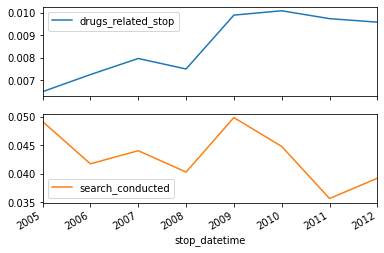

In [24]:
# Calculate and save the annual search rate
annual_search_rate = ri.search_conducted.resample('A').mean()

# Concatenate 'annual_drug_rate' and 'annual_search_rate'
annual = pd.concat([annual_drug_rate, annual_search_rate], axis=1)

# Create subplots from 'annual'
annual.plot(subplots=True)

# Display the subplots
plt.show()

In [25]:
# Create a frequency table of districts and violations
print(pd.crosstab(ri.district, ri.violation))

# Save the frequency table as 'all_zones'
all_zones = pd.crosstab(ri.district, ri.violation)

# Select rows 'Zone K1' through 'Zone K3'
print(all_zones.loc['Zone K1':'Zone K3'])

# Save the smaller table as 'k_zones'
k_zones = all_zones.loc['Zone K1':'Zone K3']

violation  Equipment  Moving violation  Other  Registration/plates  Speeding
district                                                                    
Zone               0                 0      0                    0         1
Zone K1          660              1226    288                  119      5887
Zone K2          640              1571    720                  371      6439
Zone K3         1057              1506    541                  357      8401
Zone X1          144               436     90                   11       800
Zone X3          839              1749    542                  328      6078
Zone X4         1879              3476   1152                  906      6866
violation  Equipment  Moving violation  Other  Registration/plates  Speeding
district                                                                    
Zone K1          660              1226    288                  119      5887
Zone K2          640              1571    720                  371      6439

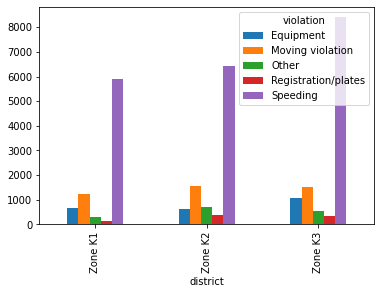

In [26]:
# Create a bar plot of 'k_zones'
k_zones.plot(kind='bar')

# Display the plot
plt.show()

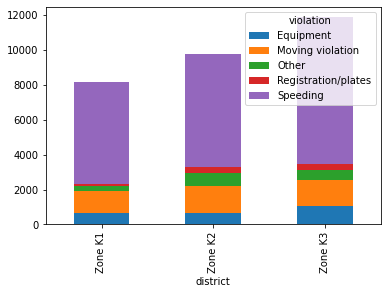

In [27]:
# Create a stacked bar plot of 'k_zones'
k_zones.plot(kind='bar', stacked=True)

# Display the plot
plt.show()

In [28]:
# Print the unique values in 'stop_duration'
print(ri.stop_duration.unique())

# Create a dictionary that maps strings to integers
mapping = {'0-15 Min': 8, '16-30 Min': 23, '30+ Min': 45}

# Convert the 'stop_duration' strings to integers using the 'mapping'
ri['stop_minutes'] = ri.stop_duration.map(mapping)

# Print the unique values in 'stop_minutes'
print(ri.stop_minutes.unique())

['0-15 Min' '16-30 Min' '30+ Min']
[ 8 23 45]


violation_raw
APB                                 21.000000
Call for Service                    25.145408
Equipment/Inspection Violation      13.053075
Motorist Assist/Courtesy            18.351562
Other Traffic Violation             15.581995
Registration Violation              16.239962
Special Detail/Directed Patrol      15.180479
Speeding                            10.976677
Suspicious Person                   15.861111
Violation of City/Town Ordinance    14.169014
Warrant                             27.545455
Name: stop_minutes, dtype: float64


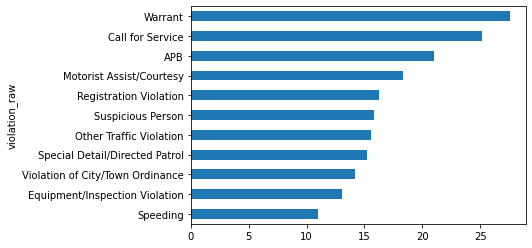

In [29]:
# Calculate the mean 'stop_minutes' for each value in 'violation_raw'
print(ri.groupby('violation_raw').stop_minutes.mean())

# Save the resulting Series as 'stop_length'
stop_length = ri.groupby('violation_raw').stop_minutes.mean()

# Sort 'stop_length' by its values and create a horizontal bar plot
stop_length.sort_values().plot(kind='barh')

# Display the plot
plt.show()

              TMIN         TAVG         TMAX
count  4017.000000  1217.000000  4017.000000
mean     43.484441    52.493016    61.268608
std      17.020298    17.830714    18.199517
min      -5.000000     6.000000    15.000000
25%      30.000000    39.000000    47.000000
50%      44.000000    54.000000    62.000000
75%      58.000000    68.000000    77.000000
max      77.000000    86.000000   102.000000


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


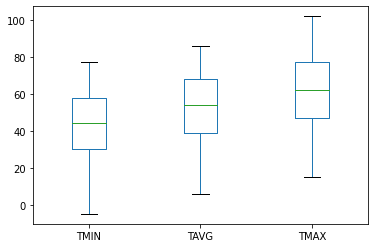

In [30]:
# Read 'weather.csv' into a DataFrame named 'weather'
weather = pd.read_csv('weather.csv')

# Describe the temperature columns
print(weather[['TMIN', 'TAVG', 'TMAX']].describe())

# Create a box plot of the temperature columns
weather[['TMIN', 'TAVG', 'TMAX']].plot(kind='box')

# Display the plot
plt.show()

count    4017.000000
mean       17.784167
std         6.350720
min         2.000000
25%        14.000000
50%        18.000000
75%        22.000000
max        43.000000
Name: TDIFF, dtype: float64


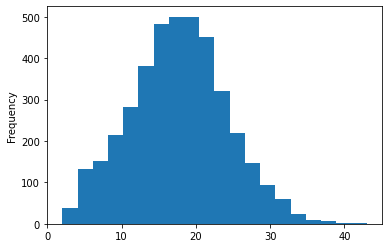

In [31]:
# Create a 'TDIFF' column that represents temperature difference
weather['TDIFF'] = weather['TMAX'] - weather['TMIN']

# Describe the 'TDIFF' column
print(weather['TDIFF'].describe())

# Create a histogram with 20 bins to visualize 'TDIFF'
weather['TDIFF'].plot(kind='hist', bins=20)

# Display the plot
plt.show()

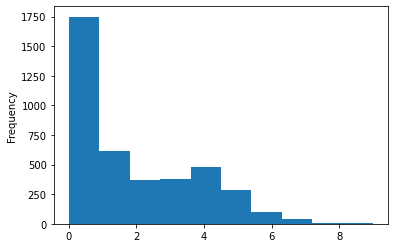

In [32]:
# Copy 'WT01' through 'WT22' to a new DataFrame
WT = weather.loc[:, 'WT01':'WT22']

# Calculate the sum of each row in 'WT'
weather['bad_conditions'] = WT.sum(axis=1)

# Replace missing values in 'bad_conditions' with '0'
weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')

# Create a histogram to visualize 'bad_conditions'
weather['bad_conditions'].plot(kind='hist')

# Display the plot
plt.show()

In [33]:
# Count the unique values in 'bad_conditions' and sort the index
print(weather.bad_conditions.value_counts().sort_index())

# Create a dictionary that maps integers to strings
mapping = {0:'good', 1:'bad', 2:'bad', 3: 'bad', 4: 'bad', 5: 'worse', 6: 'worse', 7: 'worse', 8: 'worse', 9: 'worse'}

# Convert the 'bad_conditions' integers to strings using the 'mapping'
weather['rating'] = weather.bad_conditions.map(mapping)

# Count the unique values in 'rating'
print(weather['rating'].value_counts())

0    1749
1     613
2     367
3     380
4     476
5     282
6     101
7      41
8       4
9       4
Name: bad_conditions, dtype: int64
bad      1836
good     1749
worse     432
Name: rating, dtype: int64


In [37]:
# Create a list of weather ratings in logical order
cats = ['good', 'bad', 'worse']

# Change the data type of 'rating' to category
#weather['rating'] = weather.rating.astype('category', ordered=True, categories=cats)
weather['rating'] = weather.rating.astype('category')

# Examine the head of 'rating'
print(weather['rating'].head())

0    bad
1    bad
2    bad
3    bad
4    bad
Name: rating, dtype: category
Categories (3, object): ['bad', 'good', 'worse']


In [38]:
# Reset the index of 'ri'
ri.reset_index(inplace=True)

# Examine the head of 'ri'
print(ri.head())

# Create a DataFrame from the 'DATE' and 'rating' columns
weather_rating = weather[['DATE', 'rating']]

# Examine the head of 'weather_rating'
print(weather_rating.head())

        stop_datetime   stop_date stop_time  ... district  frisk stop_minutes
0 2005-01-04 12:55:00  2005-01-04     12:55  ...  Zone X4  False            8
1 2005-01-23 23:15:00  2005-01-23     23:15  ...  Zone K3  False            8
2 2005-02-17 04:15:00  2005-02-17     04:15  ...  Zone X4  False            8
3 2005-02-20 17:15:00  2005-02-20     17:15  ...  Zone X1  False           23
4 2005-02-24 01:20:00  2005-02-24     01:20  ...  Zone X3  False            8

[5 rows x 16 columns]
         DATE rating
0  2005-01-01    bad
1  2005-01-02    bad
2  2005-01-03    bad
3  2005-01-04    bad
4  2005-01-05    bad


In [39]:
# Examine the shape of 'ri'
print(ri.shape)

# Merge 'ri' and 'weather_rating' using a left join
ri_weather = pd.merge(left=ri, right=weather_rating, left_on='stop_date', right_on='DATE', how='inner')

# Examine the shape of 'ri_weather'
print(ri_weather.shape)

# Set 'stop_datetime' as the index of 'ri_weather'
ri_weather.set_index('stop_datetime', inplace=True)

(55080, 16)
(55080, 18)


In [40]:
# Calculate the overall arrest rate
print(ri_weather.is_arrested.mean())

0.03798111837327524


In [41]:
# Calculate the arrest rate for each 'rating'
print(ri_weather.groupby('rating').is_arrested.mean())

rating
bad      0.039244
good     0.035243
worse    0.041754
Name: is_arrested, dtype: float64


In [42]:
# Calculate the arrest rate for each 'violation' and 'rating'
print(ri_weather.groupby(['violation', 'rating']).is_arrested.mean())

violation            rating
Equipment            bad       0.083234
                     good      0.072745
                     worse     0.098431
Moving violation     bad       0.063387
                     good      0.057625
                     worse     0.066306
Other                bad       0.090783
                     good      0.062948
                     worse     0.062992
Registration/plates  bad       0.125385
                     good      0.120497
                     worse     0.117834
Speeding             bad       0.015328
                     good      0.016327
                     worse     0.016755
Name: is_arrested, dtype: float64


In [43]:
# Save the output of the groupby operation from the last exercise
arrest_rate = ri_weather.groupby(['violation', 'rating']).is_arrested.mean()

# Print the 'arrest_rate' Series
print(arrest_rate)

# Print the arrest rate for moving violations in bad weather
print(arrest_rate.loc['Moving violation', 'bad'])

# Print the arrest rates for speeding violations in all three weather conditions
print(arrest_rate.loc['Speeding'])

violation            rating
Equipment            bad       0.083234
                     good      0.072745
                     worse     0.098431
Moving violation     bad       0.063387
                     good      0.057625
                     worse     0.066306
Other                bad       0.090783
                     good      0.062948
                     worse     0.062992
Registration/plates  bad       0.125385
                     good      0.120497
                     worse     0.117834
Speeding             bad       0.015328
                     good      0.016327
                     worse     0.016755
Name: is_arrested, dtype: float64
0.06338652482269504
rating
bad      0.015328
good     0.016327
worse    0.016755
Name: is_arrested, dtype: float64


In [44]:
# Unstack the 'arrest_rate' Series into a DataFrame
print(arrest_rate.unstack())

# Create the same DataFrame using a pivot table
print(ri_weather.pivot_table(index='violation', columns='rating', values='is_arrested'))

rating                    bad      good     worse
violation                                        
Equipment            0.083234  0.072745  0.098431
Moving violation     0.063387  0.057625  0.066306
Other                0.090783  0.062948  0.062992
Registration/plates  0.125385  0.120497  0.117834
Speeding             0.015328  0.016327  0.016755
rating                    bad      good     worse
violation                                        
Equipment            0.083234  0.072745  0.098431
Moving violation     0.063387  0.057625  0.066306
Other                0.090783  0.062948  0.062992
Registration/plates  0.125385  0.120497  0.117834
Speeding             0.015328  0.016327  0.016755
